  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

=== KNN Results ===
Accuracy: 0.9201793721973094
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       965
           1       1.00      0.41      0.58       150

    accuracy                           0.92      1115
   macro avg       0.96      0.70      0.77      1115
weighted avg       0.93      0.92      0.91      1115


=== SVM Results ===
Accuracy: 0.9775784753363229
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.87      0.91       150

    accuracy                           0.98      1115
 

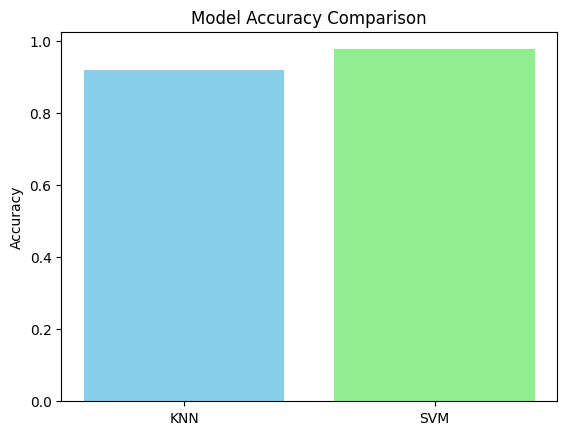

In [2]:
# ---------------------------------------------
# 2. Load and preprocess dataset
# ---------------------------------------------
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1')
df = df.rename(columns={'v1': 'label', 'v2': 'message'})
df = df[['label', 'message']]
print(df.head())

# Convert labels to binary (1 = spam, 0 = ham)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# ---------------------------------------------
# 3. Text vectorization
# ---------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['message']
y = df['label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ---------------------------------------------
# 4. K-Nearest Neighbors (KNN)
# ---------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)
y_pred_knn = knn.predict(X_test_vec)

print("\n=== KNN Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# ---------------------------------------------
# 5. Support Vector Machine (SVM)
# ---------------------------------------------
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_vec, y_train)
y_pred_svm = svm.predict(X_test_vec)

print("\n=== SVM Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# ---------------------------------------------
# 6. Compare performances
# ---------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

acc_knn = accuracy_score(y_test, y_pred_knn)
acc_svm = accuracy_score(y_test, y_pred_svm)

plt.bar(['KNN', 'SVM'], [acc_knn, acc_svm], color=['skyblue', 'lightgreen'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()